# Handout #16 - Part A: Polynomial Terms

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## Example 18.1
US Weather

<table>
  <tr>
    <td width='50%'>
      <ul>
        <li>Response:  JanTemp</li>
        <li>Predictors:
          <ul>
          <li>Latitude</li>
          <li>Longitude</li>
          </ul>
    </ul>
    </td>
    <td width='50%'>
<p align='center'><img src="https://drive.google.com/uc?export=view&id=1k_3TW95gSfcpTjXpu81ZVt9egxbJyqX_" width="50%",height="50%"></img></p>
  </td>
</tr>
</table>

Data Folder: [OneDrive](https://mnscu-my.sharepoint.com/:f:/g/personal/aq7839yd_minnstate_edu/EmOQfrwxzzRBqq8PH_8qTmMBy-1qKgM11Hb8vzjs025EEA?e=wyShYs)

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>



## Load Data into R via URL

The tidyverse R package will be used to assist with reading in the dataset into the current R session.

In [ ]:
#load tidyverse package
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



The **read_csv()** function is used to read in the dataset. 

In [ ]:
# Reading data in using read_csv via tidyverse 
US_WeatherData <- read_csv("http://www.StatsClass.org/stat360/Datasets/USCity_WeatherData.csv")

Rows: 95 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): City
dbl (9): Latitude, Longitude, JanTemp, AprilTemp, JulyTemp, OctTemp, Precipi...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



A review of the first few lines of dataset.

In [ ]:
#show the first few rows of data
head(US_WeatherData)
dim(US_WeatherData)

City              Latitude Longitude JanTemp AprilTemp JulyTemp OctTemp
1 Albany, NY        42.67     73.75    22.2    46.6      71.1     49.3   
2 Albuquerque, NM   35.08    106.65     5.7    55.6      78.5     57.3   
3 Asheville, NC     35.35     82.33    35.8    54.1      73.0     55.2   
4 Atlanta, GA       33.75     84.38    42.7    61.6      80.0     62.8   
5 Atlantic City, NJ 39.21     74.25    32.1    50.6      75.3     55.1   
6 Austin, TX        30.27     97.73    50.2    68.3      84.2     70.6   
  Precipitation(in) Percipitation(days) Snowfall(in)
1 38.60             136                 64.4        
2  9.47              60                 11.0        
3 47.07             126                 15.3        
4 50.20             115                  2.1        
5 40.59             113                 16.2        
6 33.65              85                   NA

[1] 95 10

## Remove Albuquerque, NM

In [ ]:
US_WeatherData_NoAlbuqNM <- ( US_WeatherData
                                 %>% filter(City != 'Albuquerque, NM')
                            )
dim(US_WeatherData_NoAlbuqNM)

[1] 94 10

In [ ]:
head(US_WeatherData_NoAlbuqNM)

City              Latitude Longitude JanTemp AprilTemp JulyTemp OctTemp
1 Albany, NY        42.67    73.75     22.2    46.6      71.1     49.3   
2 Asheville, NC     35.35    82.33     35.8    54.1      73.0     55.2   
3 Atlanta, GA       33.75    84.38     42.7    61.6      80.0     62.8   
4 Atlantic City, NJ 39.21    74.25     32.1    50.6      75.3     55.1   
5 Austin, TX        30.27    97.73     50.2    68.3      84.2     70.6   
6 Baltimore, MD     39.30    76.63     32.3    53.2      76.5     55.4   
  Precipitation(in) Percipitation(days) Snowfall(in)
1 38.60             136                 64.4        
2 47.07             126                 15.3        
3 50.20             115                  2.1        
4 40.59             113                 16.2        
5 33.65              85                   NA        
6 41.94             115                 21.5

## Fitting an initial model

In [ ]:
#Terms: Latitude and Longitude 
Model_LatLong <- lm(JanTemp ~ Latitude + Longitude, data=US_WeatherData_NoAlbuqNM)
#Getting a summary of this model
summary(Model_LatLong)


Call:
lm(formula = JanTemp ~ Latitude + Longitude, data = US_WeatherData_NoAlbuqNM)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.5985  -4.0345  -0.4142   3.2326  19.8956 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 98.50192    5.55281  17.739  < 2e-16 ***
Latitude    -2.19292    0.11404 -19.229  < 2e-16 ***
Longitude    0.22014    0.03962   5.556 2.73e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.764 on 91 degrees of freedom
Multiple R-squared:  0.8106,	Adjusted R-squared:  0.8064 
F-statistic: 194.7 on 2 and 91 DF,  p-value: < 2.2e-16


In [ ]:
residualplot_data <- (US_WeatherData_NoAlbuqNM
                      %>% select(City, Latitude, Longitude, JanTemp)
                      %>% mutate(Residuals =Model_LatLong$residuals, Predicted = Model_LatLong$fitted.values)
                     )

head(residualplot_data)

City              Latitude Longitude JanTemp Residuals  Predicted
1 Albany, NY        42.67    73.75     22.2     1.0348513 21.16515 
2 Asheville, NC     35.35    82.33     35.8    -3.3060756 39.10608 
3 Atlanta, GA       33.75    84.38     42.7    -0.3660232 43.06602 
4 Atlantic City, NJ 39.21    74.25     32.1     3.2372872 28.86271 
5 Austin, TX        30.27    97.73     50.2    -3.4361944 53.63619 
6 Baltimore, MD     39.30    76.63     32.3     3.1107259 29.18927

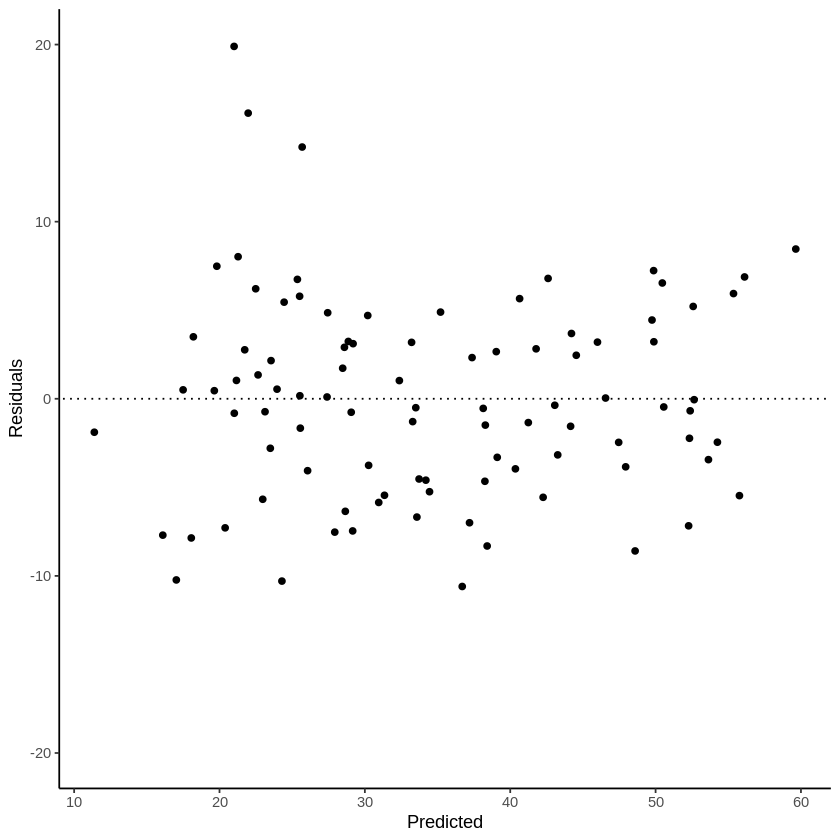

In [ ]:
ggplot(data=residualplot_data, aes(x=Predicted, y=Residuals)) + 
 geom_point() +
 geom_abline(intercept=0, slope =0, linetype="dotted") + 
 scale_y_continuous(limits=c(-20, 20)) +
 theme_classic()

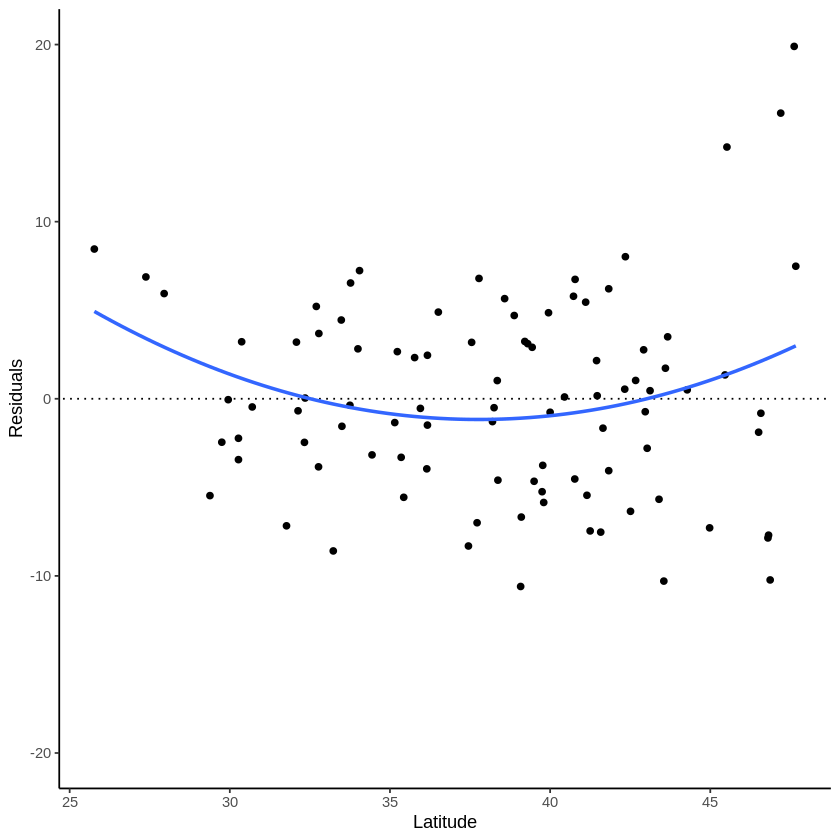

In [ ]:
ggplot(data=residualplot_data, aes(x=Latitude, y=Residuals)) + 
 geom_point() +
 geom_abline(intercept=0, slope =0, linetype="dotted") + 
 geom_smooth(method="lm", formula = y~poly(x, 2), se=FALSE) +
 scale_y_continuous(limits=c(-20, 20)) +
 theme_classic()

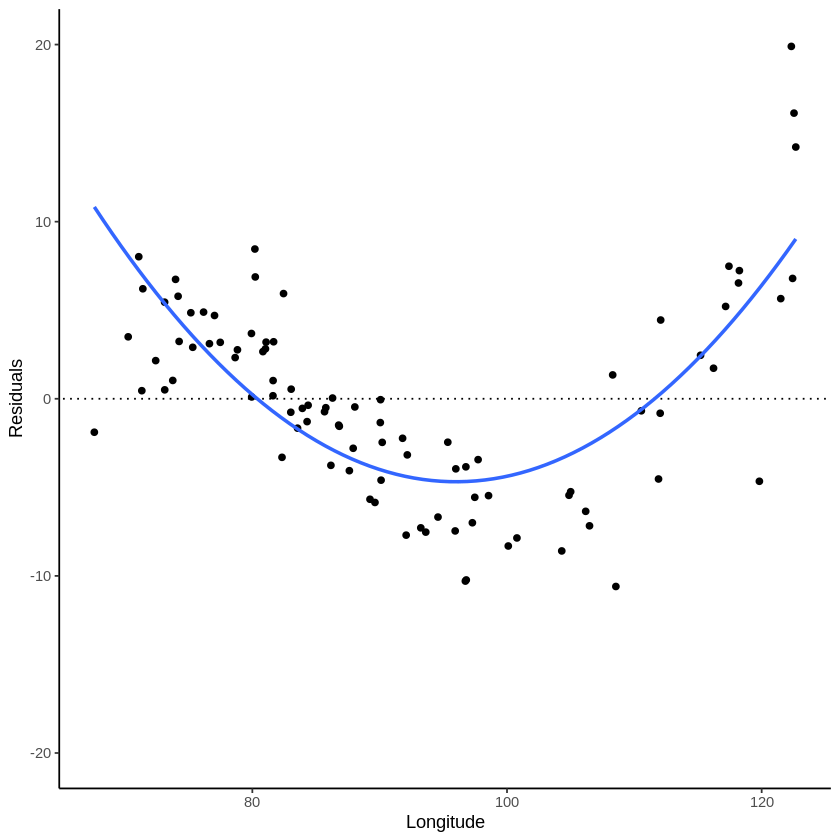

In [ ]:
ggplot(data=residualplot_data, aes(x=Longitude, y=Residuals)) + 
 geom_point() +
 geom_abline(intercept=0, slope =0, linetype="dotted") + 
 geom_smooth(method="lm", formula = y~poly(x, 2), se=FALSE) +
 scale_y_continuous(limits=c(-20, 20)) +
 theme_classic()

`geom_smooth()` using formula 'y ~ x'



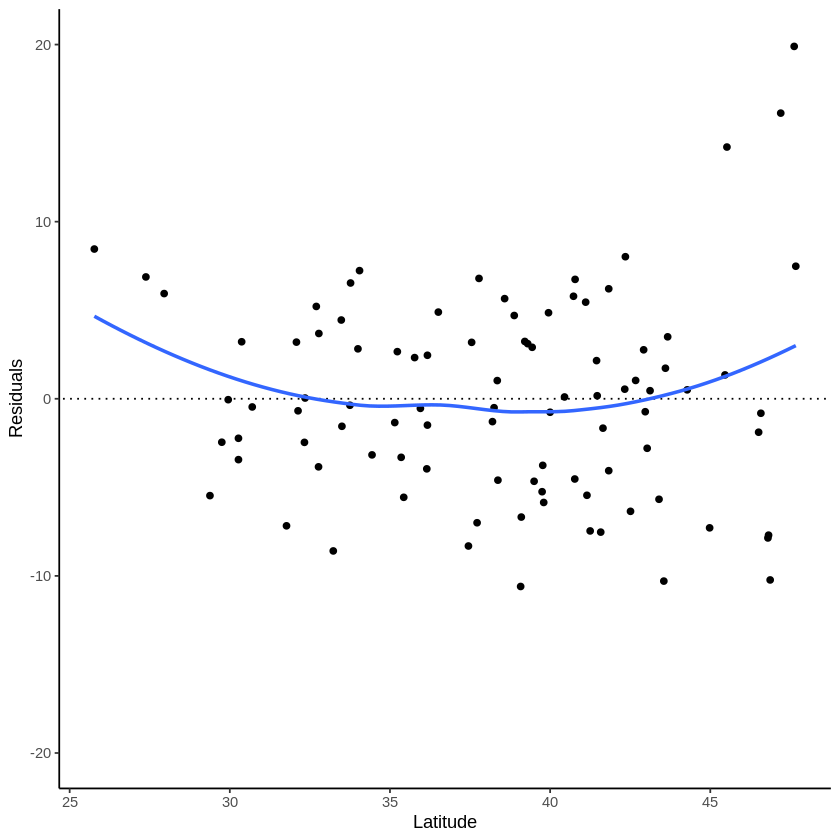

In [ ]:
ggplot(data=residualplot_data, aes(x=Latitude, y=Residuals)) + 
 geom_point() +
 geom_abline(intercept=0, slope =0, linetype="dotted") + 
 geom_smooth(method="loess", span=1.0, se=FALSE) +
 scale_y_continuous(limits=c(-20, 20)) +
 theme_classic()

`geom_smooth()` using formula 'y ~ x'



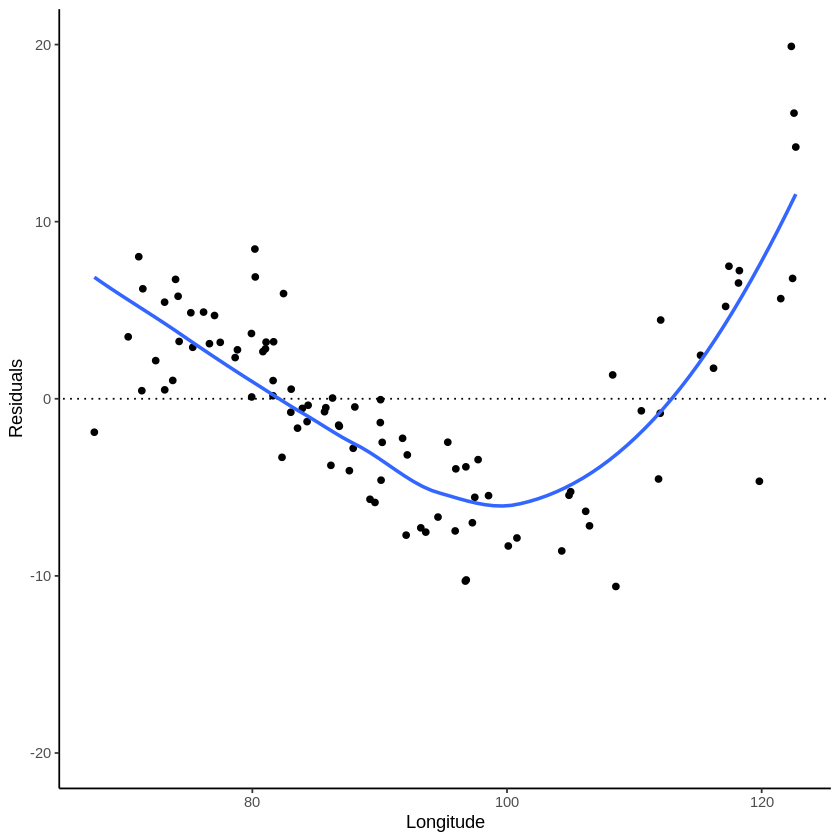

In [ ]:
ggplot(data=residualplot_data, aes(x=Longitude, y=Residuals)) + 
 geom_point() +
 geom_abline(intercept=0, slope =0, linetype="dotted") + 
 geom_smooth(method="loess", span=1.0, se=FALSE) +
 scale_y_continuous(limits=c(-20, 20)) +
 theme_classic()

## Fitting a Polynomial Terms for Longitude

In [ ]:
#Terms: Latitude, Longitude, Longitude^2
Model_Lat_Poly2Long <- lm(JanTemp ~ Latitude + poly(Longitude,degree=2), data=US_WeatherData_NoAlbuqNM)

#Getting a summary of this model
summary(Model_Lat_Poly2Long)


Call:
lm(formula = JanTemp ~ Latitude + poly(Longitude, degree = 2), 
    data = US_WeatherData_NoAlbuqNM)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.4429  -1.3873   0.3962   1.8143  12.7661 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  129.90304    2.86107   45.40  < 2e-16 ***
Latitude                      -2.48496    0.07403  -33.57  < 2e-16 ***
poly(Longitude, degree = 2)1  32.94039    3.54979    9.28 9.01e-15 ***
poly(Longitude, degree = 2)2  45.94766    3.74133   12.28  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.543 on 90 degrees of freedom
Multiple R-squared:  0.9292,	Adjusted R-squared:  0.9269 
F-statistic: 393.8 on 3 and 90 DF,  p-value: < 2.2e-16


In [ ]:
residualplot_data <- (US_WeatherData_NoAlbuqNM
                      %>% select(City, Latitude, Longitude, JanTemp)
                      %>% mutate(Residuals=Model_Lat_Poly2Long$residuals, Predicted = Model_Lat_Poly2Long$fitted.values)
                     )

head(residualplot_data)

City              Latitude Longitude JanTemp Residuals  Predicted
1 Albany, NY        42.67    73.75     22.2    -2.9775643 25.17756 
2 Asheville, NC     35.35    82.33     35.8    -2.8997781 38.69978 
3 Atlanta, GA       33.75    84.38     42.7     0.6720570 42.02794 
4 Atlantic City, NJ 39.21    74.25     32.1    -1.3168535 33.41685 
5 Austin, TX        30.27    97.73     50.2    -0.6674942 50.86749 
6 Baltimore, MD     39.30    76.63     32.3     0.6670531 31.63295

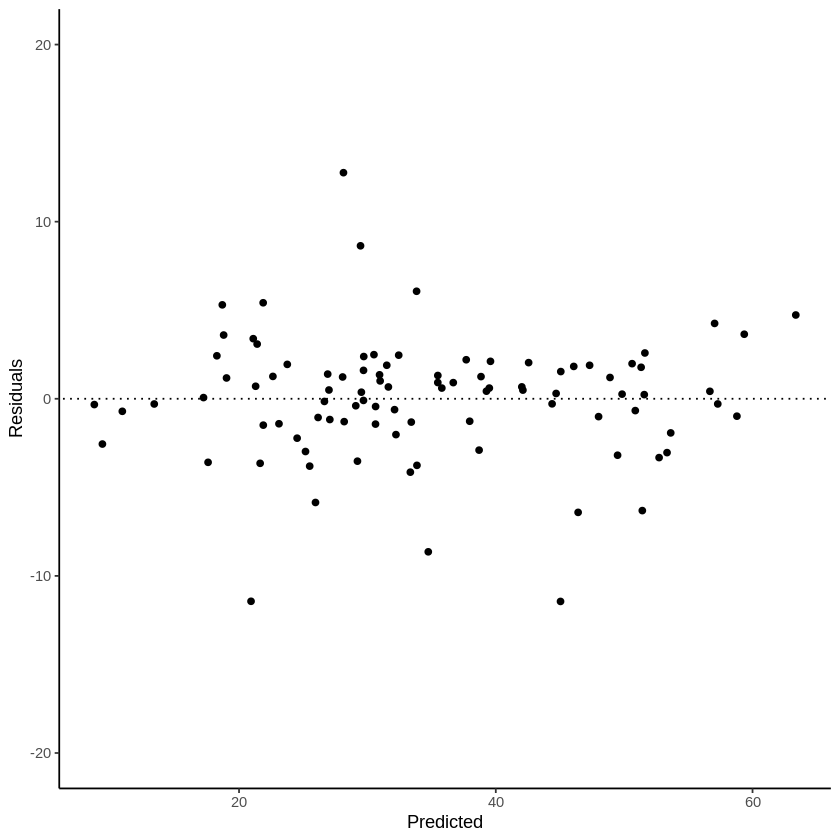

In [ ]:
ggplot(data=residualplot_data, aes(x=Predicted, y=Residuals)) + 
 geom_point() +
 geom_abline(intercept=0, slope =0, linetype="dotted") + 
 scale_y_continuous(limits=c(-20, 20)) +
 theme_classic()

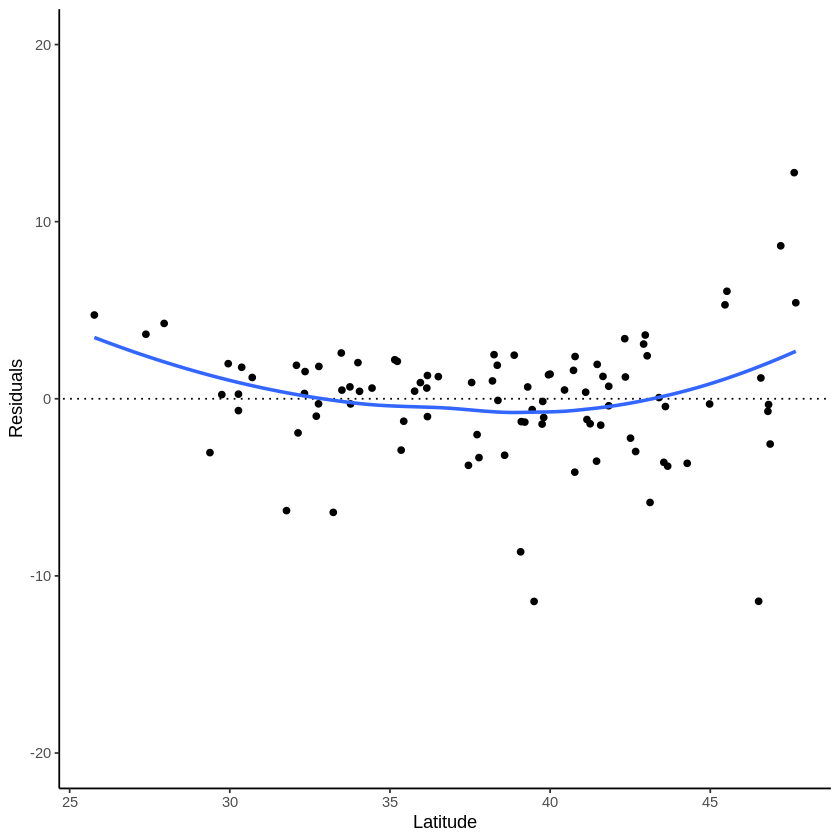

In [ ]:
ggplot(data=residualplot_data, aes(x=Latitude, y=Residuals)) + 
 geom_point() +
 geom_abline(intercept=0, slope =0, linetype="dotted") + 
 geom_smooth(method="loess", formula = y~x, span=1.0, se=FALSE) +
 scale_y_continuous(limits=c(-20, 20)) +
 theme_classic()

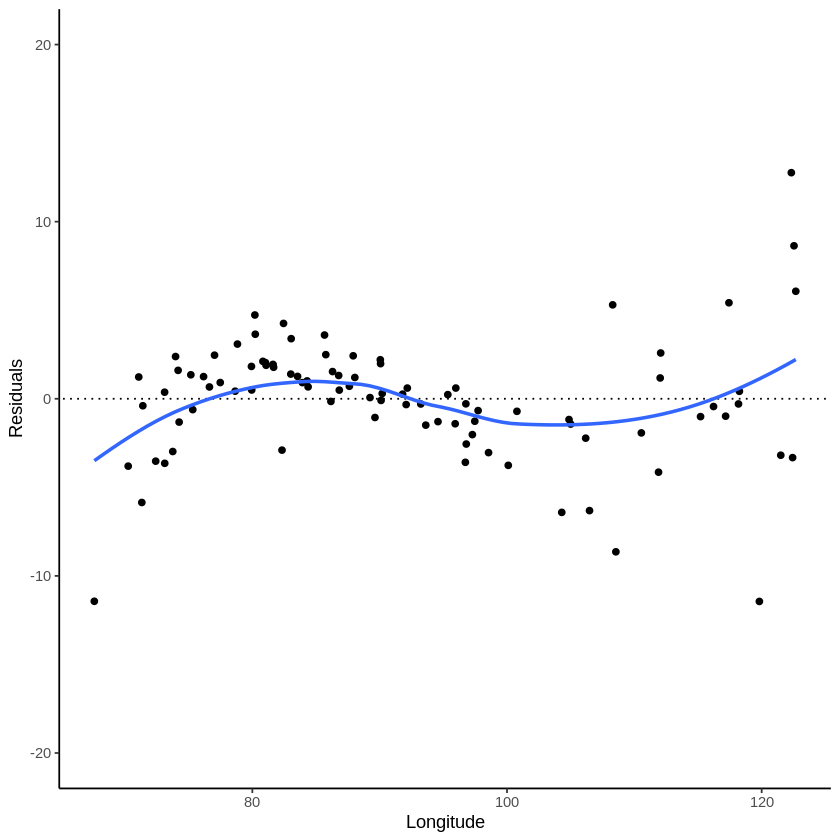

In [ ]:
ggplot(data=residualplot_data, aes(x=Longitude, y=Residuals)) + 
 geom_point() +
 geom_abline(intercept=0, slope =0, linetype="dotted") + 
 geom_smooth(method="loess", formula = y~ x, span=1.0, se=FALSE) +
 scale_y_continuous(limits=c(-20, 20)) +
 theme_classic()

## Third Degree Poly

In [ ]:
#Terms: Latitude, Longitude, Longitude^2, Longitude^3
Model_Lat_Poly3Long <- lm(JanTemp ~ Latitude + poly(Longitude,degree=3), data=US_WeatherData_NoAlbuqNM)

#Getting a summary of this model
summary(Model_Lat_Poly3Long)


Call:
lm(formula = JanTemp ~ Latitude + poly(Longitude, degree = 3), 
    data = US_WeatherData_NoAlbuqNM)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.7138  -1.0795   0.1146   1.4033   8.4928 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  127.30304    2.37728  53.550  < 2e-16 ***
Latitude                      -2.41713    0.06152 -39.289  < 2e-16 ***
poly(Longitude, degree = 3)1  32.73973    2.91017  11.250  < 2e-16 ***
poly(Longitude, degree = 3)2  44.84645    3.07142  14.601  < 2e-16 ***
poly(Longitude, degree = 3)3  19.73616    2.94458   6.703 1.81e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.904 on 89 degrees of freedom
Multiple R-squared:  0.953,	Adjusted R-squared:  0.9508 
F-statistic: 450.8 on 4 and 89 DF,  p-value: < 2.2e-16


In [ ]:
residualplot_data <- (US_WeatherData_NoAlbuqNM
                      %>% select(City, Latitude, Longitude, JanTemp)
                      %>% mutate(Residuals=Model_Lat_Poly3Long$residuals, Predicted = Model_Lat_Poly3Long$fitted.values)
                     )

head(residualplot_data)

City              Latitude Longitude JanTemp Residuals   Predicted
1 Albany, NY        42.67    73.75     22.2    -2.24289547 24.44290 
2 Asheville, NC     35.35    82.33     35.8    -4.59064006 40.39064 
3 Atlanta, GA       33.75    84.38     42.7    -0.91890130 43.61890 
4 Atlantic City, NJ 39.21    74.25     32.1    -0.67315553 32.77316 
5 Austin, TX        30.27    97.73     50.2     1.10987974 49.09012 
6 Baltimore, MD     39.30    76.63     32.3     0.04444318 32.25556

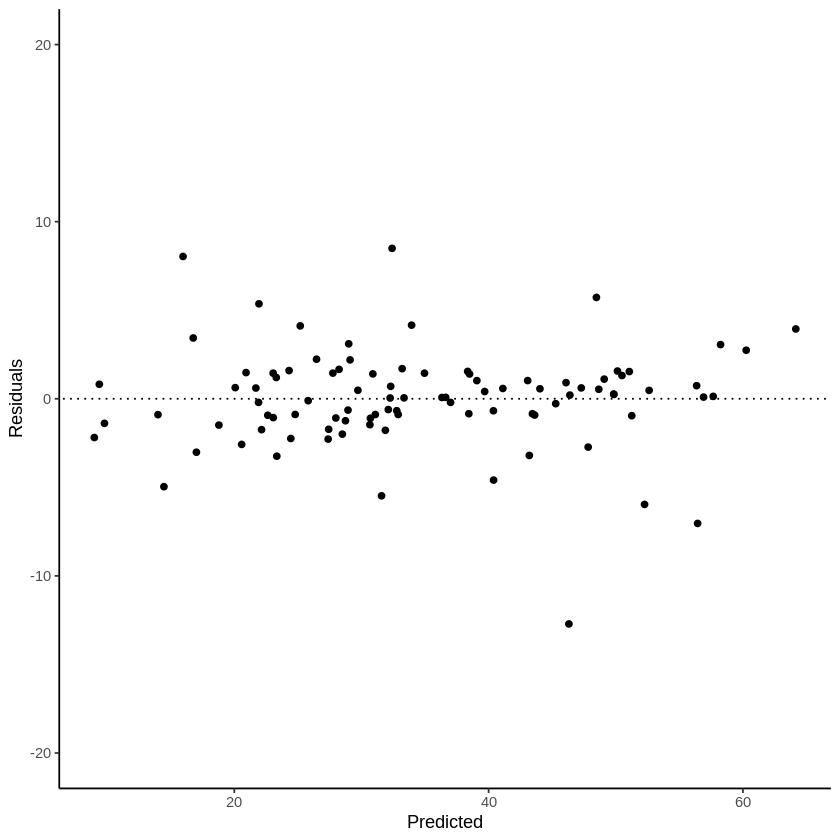

In [ ]:
ggplot(data=residualplot_data, aes(x=Predicted, y=Residuals)) + 
 geom_point() +
 geom_abline(intercept=0, slope =0, linetype="dotted") + 
 scale_y_continuous(limits=c(-20, 20)) +
 theme_classic()

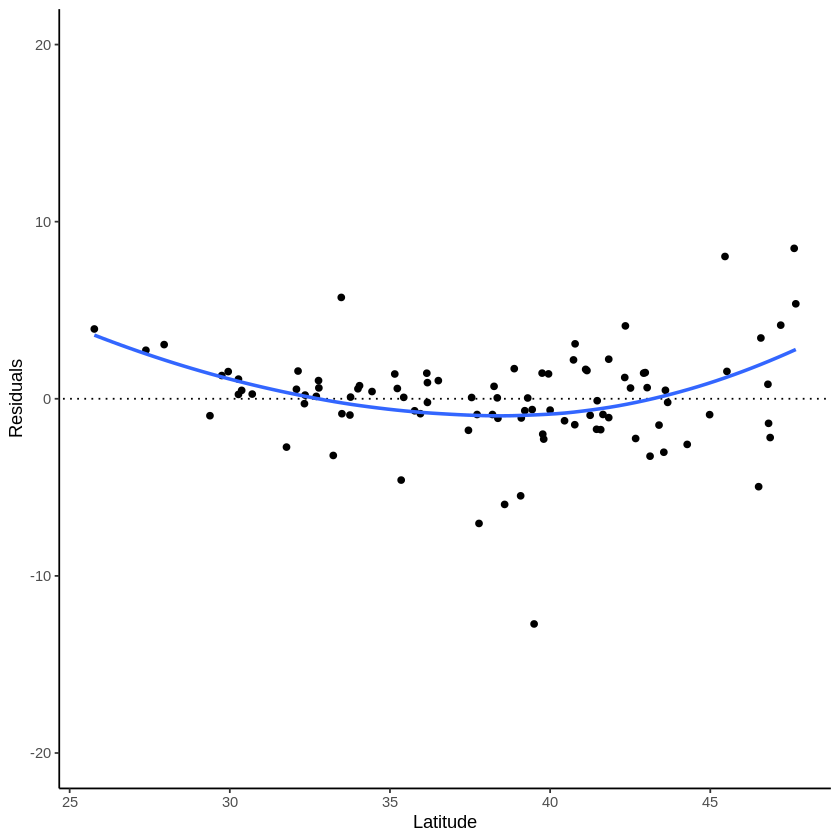

In [ ]:
ggplot(data=residualplot_data, aes(x=Latitude, y=Residuals)) + 
 geom_point() +
 geom_abline(intercept=0, slope =0, linetype="dotted") + 
 geom_smooth(method="loess", formula = y~x, span=1.0, se=FALSE) +
 scale_y_continuous(limits=c(-20, 20)) +
 theme_classic()

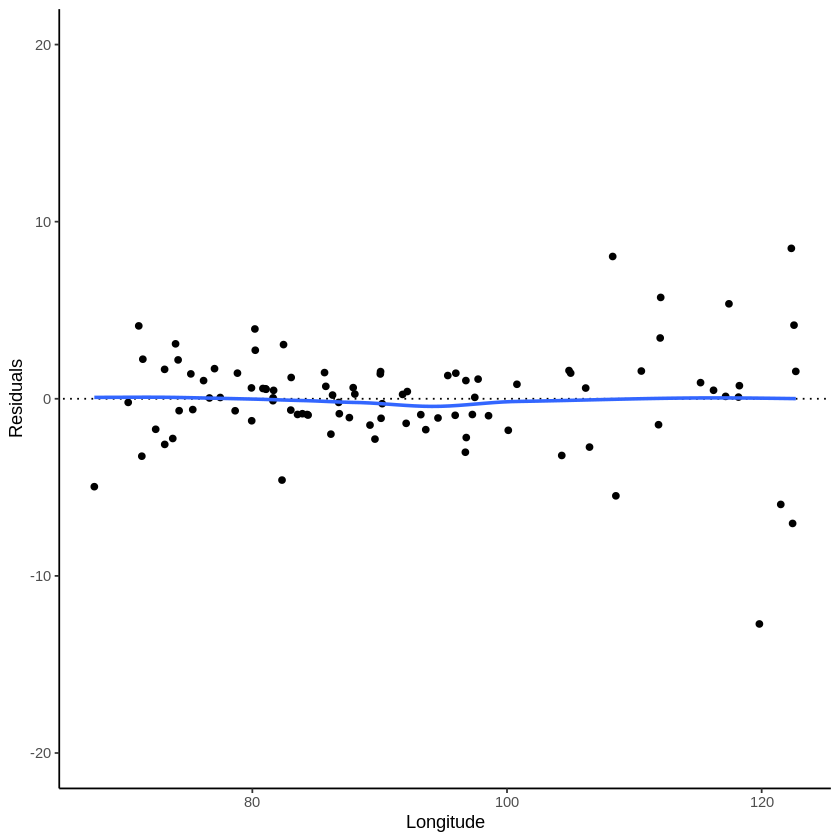

In [ ]:
ggplot(data=residualplot_data, aes(x=Longitude, y=Residuals)) + 
 geom_point() +
 geom_abline(intercept=0, slope =0, linetype="dotted") + 
 geom_smooth(method="loess", formula = y~ x, span=1.0, se=FALSE) +
 scale_y_continuous(limits=c(-20, 20)) +
 theme_classic()

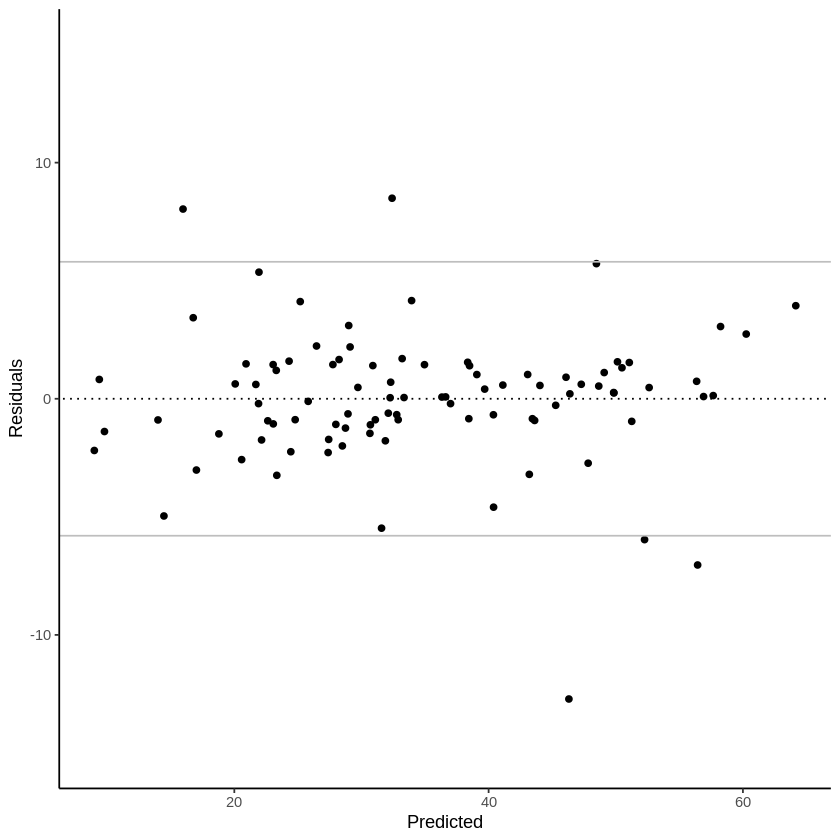

In [ ]:
ggplot(data=residualplot_data, aes(x=Predicted, y=Residuals)) + 
 geom_point() +
 geom_abline(intercept=0, slope =0, linetype="dotted") + 
 geom_abline(intercept=+5.8, slope =0, col='gray') + 
 geom_abline(intercept=-5.8, slope =0, col='gray') + 
 scale_y_continuous(limits=c(-15, 15)) +
 theme_classic()

Warning message:
“Removed 1 rows containing missing values (geom_bar).”


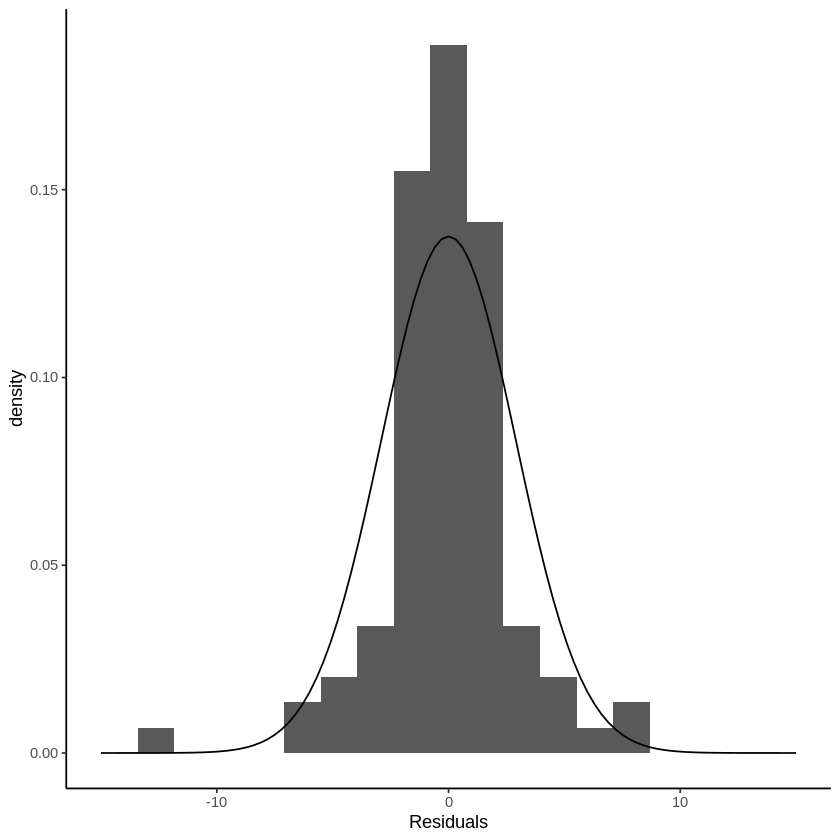

In [ ]:
#@title How Well does Normal Curve Fit
ggplot(data=residualplot_data, aes(x=Residuals)) + 
  
  geom_histogram(aes(y=..density..),bins=20) + 
  stat_function(fun = dnorm, args = list(mean = c(0), sd = c(2.9))) + 
   scale_x_continuous(limits=c(-15, 15)) +
  theme_classic()

In [ ]:
Outliers <- (residualplot_data
              %>% filter(Residuals < -5.8 | Residuals > 5.8)
              %>% arrange(Residuals)
            )

head(Outliers)

City               Latitude Longitude JanTemp Residuals  Predicted
1 Reno, NV           39.50    119.82    33.6    -12.713797 46.31380 
2 San Francisco, CA  37.78    122.43    49.4     -7.038807 56.43881 
3 Sacramento, CA     38.58    121.50    46.3     -5.965057 52.26506 
4 Billings, MT       45.46    108.30    24.0      8.033926 15.96607 
5 Seattle-Tacoma, WA 47.62    122.33    40.9      8.492844 32.40716

## Fitting model with Albuquerque, New Mexico

In [ ]:
#Terms: Latitude, Longitude, Longitude^2, Longitude^3
Model_Lat_Poly3Long <- lm(JanTemp ~ Latitude + poly(Longitude,degree=3), data=US_WeatherData)

#Getting a summary of this model
summary(Model_Lat_Poly3Long)


Call:
lm(formula = JanTemp ~ Latitude + poly(Longitude, degree = 3), 
    data = US_WeatherData)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.364  -1.069   0.356   1.754   9.351 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  124.77612    3.70445  33.683  < 2e-16 ***
Latitude                      -2.36127    0.09596 -24.608  < 2e-16 ***
poly(Longitude, degree = 3)1  28.73079    4.55132   6.313 1.01e-08 ***
poly(Longitude, degree = 3)2  46.22845    4.80969   9.612 1.83e-15 ***
poly(Longitude, degree = 3)3  25.74765    4.59911   5.598 2.32e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.544 on 90 degrees of freedom
Multiple R-squared:  0.8893,	Adjusted R-squared:  0.8844 
F-statistic: 180.8 on 4 and 90 DF,  p-value: < 2.2e-16


In [ ]:
residualplot_data <- (US_WeatherData
                      %>% select(City, Latitude, Longitude, JanTemp)
                      %>% mutate(Residuals=Model_Lat_Poly3Long$residuals, Predicted = Model_Lat_Poly3Long$fitted.values)
                     )

head(residualplot_data)

City              Latitude Longitude JanTemp Residuals   Predicted
1 Albany, NY        42.67     73.75    22.2     -2.4272000 24.62720 
2 Albuquerque, NM   35.08    106.65     5.7    -32.3643778 38.06438 
3 Asheville, NC     35.35     82.33    35.8     -4.8100354 40.61004 
4 Atlanta, GA       33.75     84.38    42.7     -0.9702603 43.67026 
5 Atlantic City, NJ 39.21     74.25    32.1     -0.7322362 32.83224 
6 Austin, TX        30.27     97.73    50.2      2.5522302 47.64777

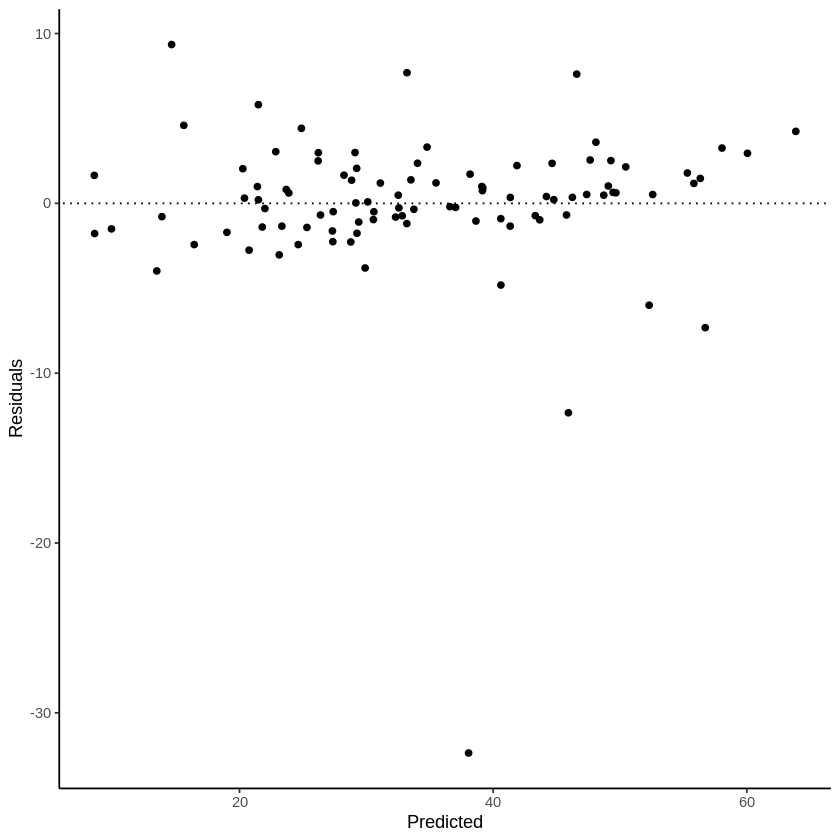

In [ ]:
ggplot(data=residualplot_data, aes(x=Predicted, y=Residuals)) + 
 geom_point() +
 geom_abline(intercept=0, slope =0, linetype="dotted") + 
 #scale_y_continuous(limits=c(-20, 20)) +
 theme_classic()

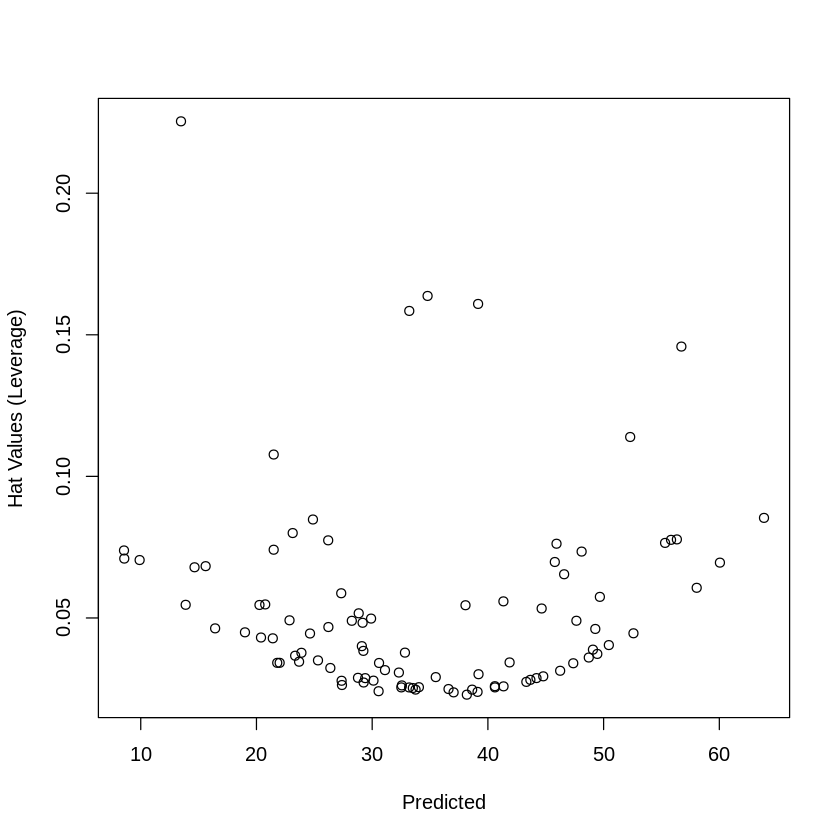

In [ ]:
#Plotting the hat values
plot(Model_Lat_Poly3Long$fitted.values, hatvalues(Model_Lat_Poly3Long), xlab="Predicted", ylab="Hat Values (Leverage)")


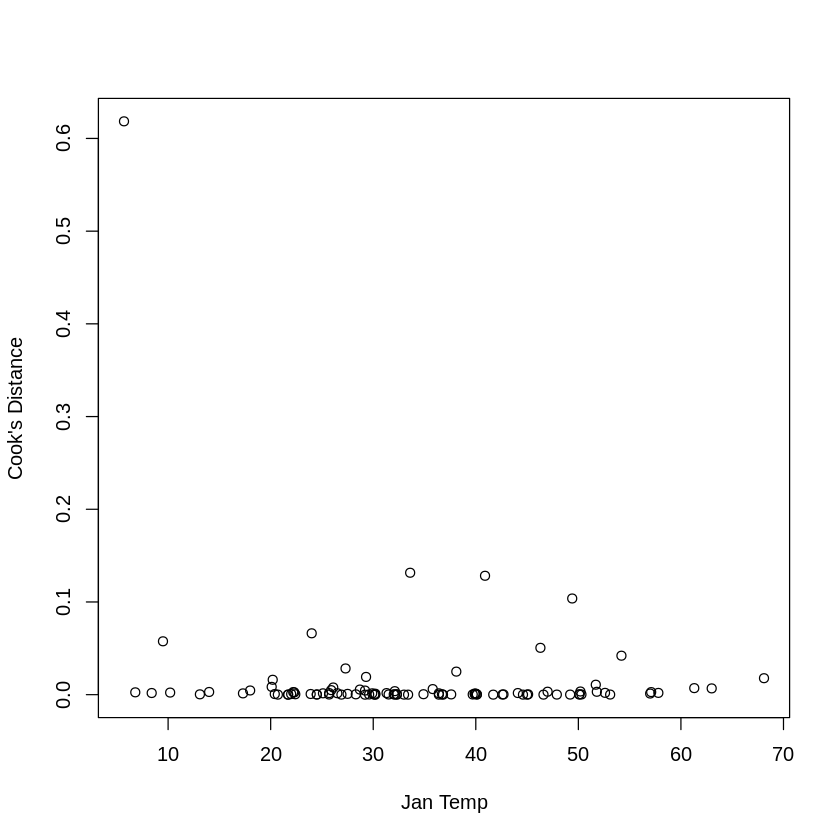

In [ ]:
#Plotting the hat values
plot(US_WeatherData$JanTemp, cooks.distance(Model_Lat_Poly3Long), xlab="Jan Temp", ylab="Cook's Distance")




---



---

End of Document